In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## EDA

In [104]:
df = pd.read_csv('/Users/abhishekwaghchaure/Desktop/FlightCostPrediction/Datasets/clean_df.csv')
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_Journey,Month_Journey,Year_Journey,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,170,0.0,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2.0,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2.0,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1.0,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1.0,13302,1,3,2019,21,35,16,50


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         10683 non-null  object 
 1   Source          10683 non-null  object 
 2   Destination     10683 non-null  object 
 3   Duration        10683 non-null  int64  
 4   Total_Stops     10683 non-null  float64
 5   Price           10683 non-null  int64  
 6   Date_Journey    10683 non-null  int64  
 7   Month_Journey   10683 non-null  int64  
 8   Year_Journey    10683 non-null  int64  
 9   Arrival_hour    10683 non-null  int64  
 10  Arrival_min     10683 non-null  int64  
 11  Departure_hour  10683 non-null  int64  
 12  Departure_min   10683 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 1.1+ MB


In [106]:
print("Numerical Statistics")
print(df.describe())

Numerical Statistics
           Duration   Total_Stops         Price  Date_Journey  Month_Journey  \
count  10683.000000  10683.000000  10683.000000  10683.000000   10683.000000   
mean     643.093232      0.824207   9087.064121     13.508378       4.708602   
std      507.862001      0.675199   4611.359167      8.479277       1.164357   
min        5.000000      0.000000   1759.000000      1.000000       3.000000   
25%      170.000000      0.000000   5277.000000      6.000000       3.000000   
50%      520.000000      1.000000   8372.000000     12.000000       5.000000   
75%      930.000000      1.000000  12373.000000     21.000000       6.000000   
max     2860.000000      4.000000  79512.000000     27.000000       6.000000   

       Year_Journey  Arrival_hour   Arrival_min  Departure_hour  Departure_min  
count       10683.0  10683.000000  10683.000000    10683.000000   10683.000000  
mean         2019.0     13.348778     24.690630       12.490686      24.411214  
std            

In [107]:
df.describe(include = 'object')

,Airline,Source,Destination
count,10683,10683,10683
unique,12,5,6
top,Jet Airways,Delhi,Cochin
freq,3849,4537,4537


## Univarate Analysis
* Use histograms for numerical features and count plots for categorical features.

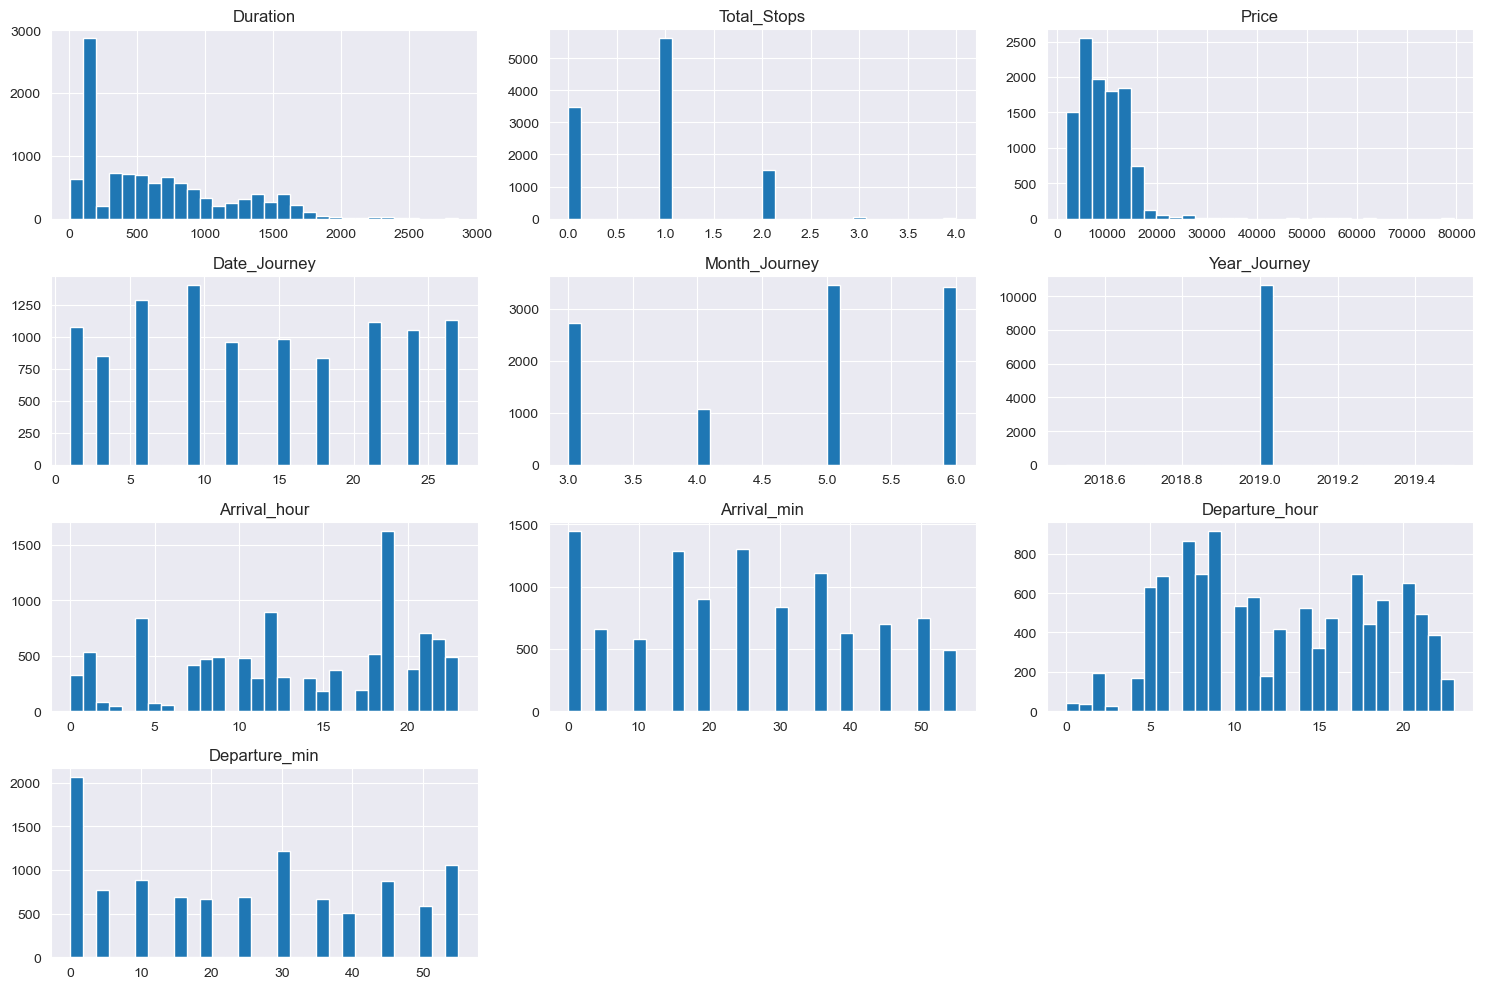

In [108]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

### We can see that the price is not normally distributed

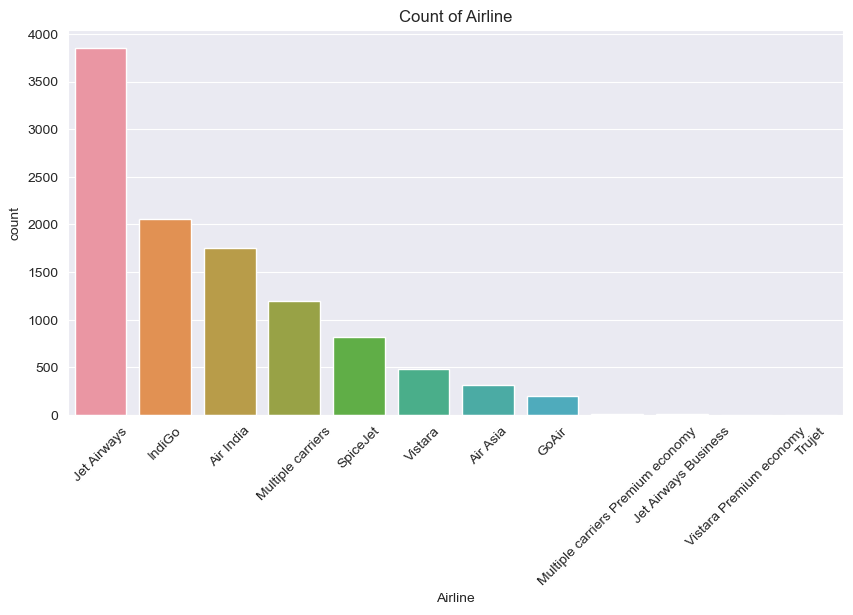

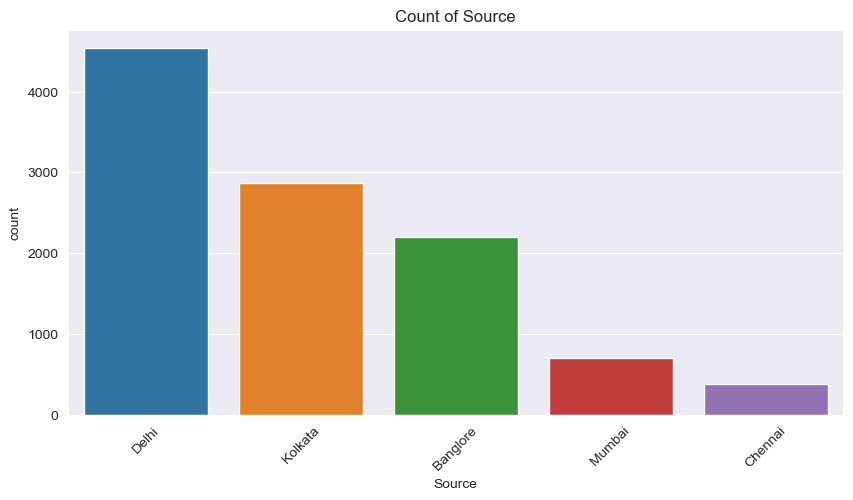

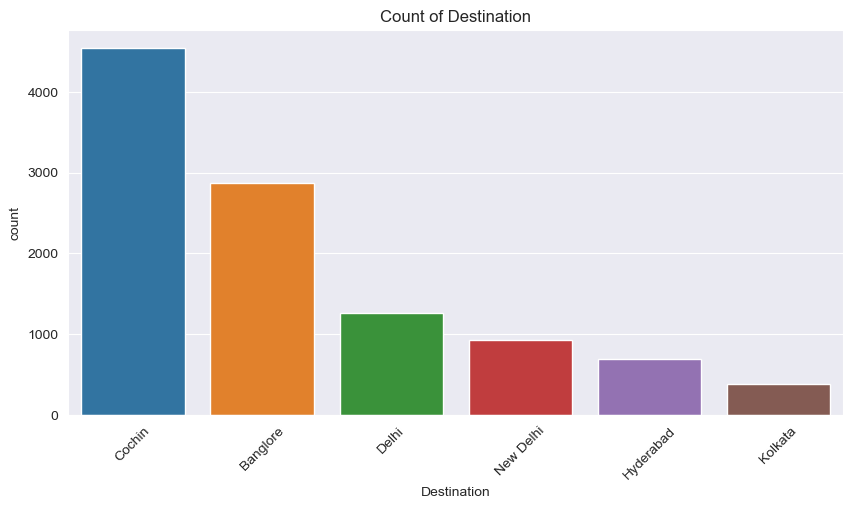

In [109]:
df_cat = df.select_dtypes(include = 'object')
for i in df_cat:
    plt.figure(figsize = (10,5))
    sns.countplot(data = df, x = i, order = df[i].value_counts().index)
    plt.title(f'Count of {i}')
    plt.xticks(rotation = 45)
    plt.show()

## Bivarate Analysis

In [110]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Display correlation matrix
print(correlation_matrix)

                Duration  Total_Stops     Price  Date_Journey  Month_Journey  \
Duration        1.000000     0.738025  0.506371     -0.022562       0.014870   
Total_Stops     0.738025     1.000000  0.603883     -0.009472       0.054389   
Price           0.506371     0.603883  1.000000     -0.153738      -0.103651   
Date_Journey   -0.022562    -0.009472 -0.153738      1.000000      -0.038378   
Month_Journey   0.014870     0.054389 -0.103651     -0.038378       1.000000   
Year_Journey         NaN          NaN       NaN           NaN            NaN   
Arrival_hour    0.051434     0.038123  0.024264     -0.003192      -0.003941   
Arrival_min    -0.069653    -0.106939 -0.086155     -0.017511      -0.100626   
Departure_hour  0.002001    -0.061490  0.006819      0.002220       0.039112   
Departure_min  -0.018938    -0.002591 -0.024492     -0.008261      -0.059238   

                Year_Journey  Arrival_hour  Arrival_min  Departure_hour  \
Duration                 NaN      0.051434  

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


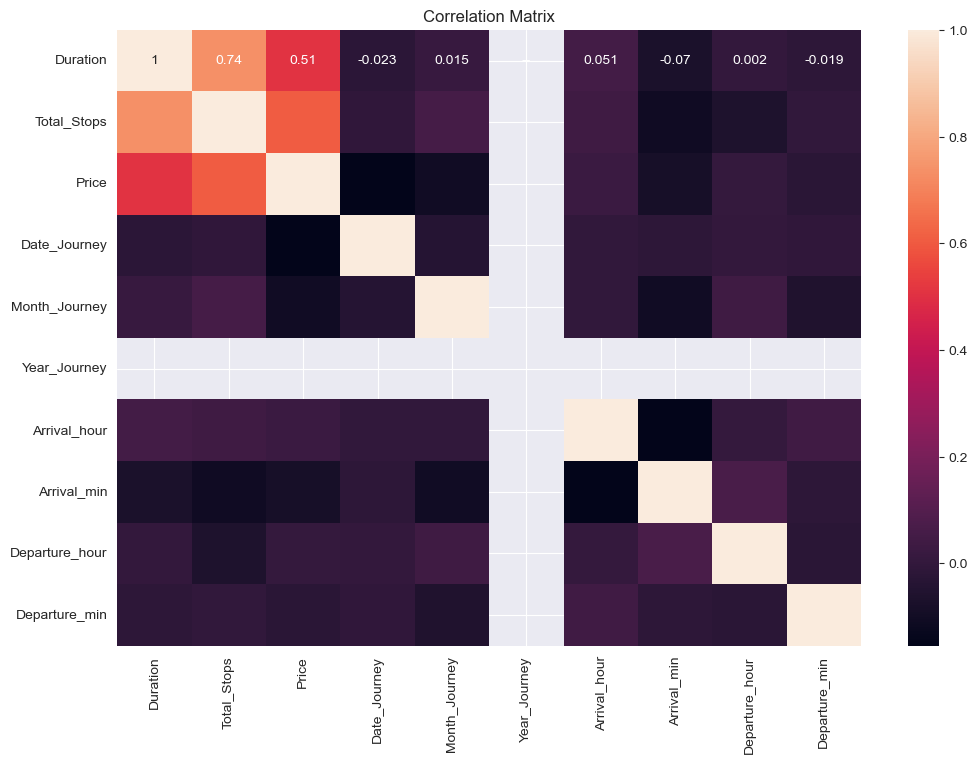

In [111]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot =True)
plt.title('Correlation Matrix')
plt.show()


In [112]:
df_encoded = pd.get_dummies(df, columns = [i for i in df_cat], drop_first = True)

<Axes: >

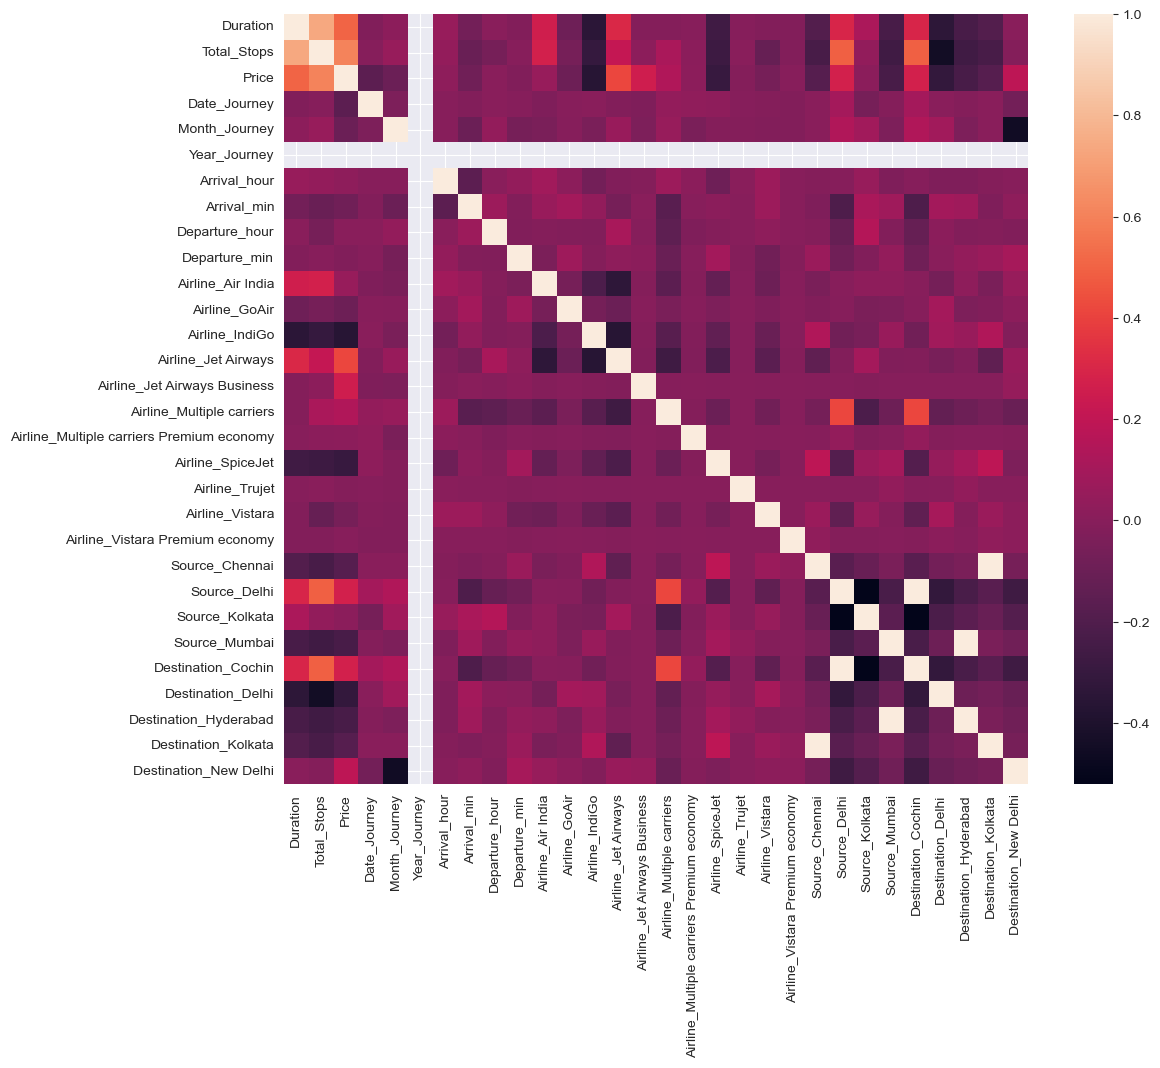

In [113]:
plt.figure(figsize = (12,10))
sns.heatmap(df_encoded.corr())

In [114]:
# Compute correlation with the target variable (e.g., Price)
correlation_with_target = df_encoded.corr()['Price'].sort_values(ascending=False)
print(correlation_with_target)

Price                                        1.000000
Total_Stops                                  0.603883
Duration                                     0.506371
Airline_Jet Airways                          0.416135
Destination_Cochin                           0.270619
Source_Delhi                                 0.270619
Airline_Jet Airways Business                 0.253302
Destination_New Delhi                        0.189785
Airline_Multiple carriers                    0.139803
Airline_Air India                            0.050346
Arrival_hour                                 0.024264
Airline_Multiple carriers Premium economy    0.017651
Source_Kolkata                               0.009377
Departure_hour                               0.006819
Airline_Vistara Premium economy             -0.000453
Airline_Trujet                              -0.010380
Departure_min                               -0.024492
Airline_Vistara                             -0.060646
Arrival_min                 

In [115]:
from sklearn.ensemble import RandomForestRegressor

# Fit a Random Forest to compute feature importance
rf = RandomForestRegressor(random_state=42)
X = df_encoded.drop(columns=['Price'])  # Features
y = df_encoded['Price']  # Target

rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

Duration                                     0.467424
Date_Journey                                 0.138646
Airline_Jet Airways Business                 0.060440
Airline_Jet Airways                          0.058457
Month_Journey                                0.055505
Arrival_hour                                 0.033295
Total_Stops                                  0.030381
Departure_hour                               0.027482
Destination_New Delhi                        0.025558
Departure_min                                0.025485
Arrival_min                                  0.022252
Airline_Multiple carriers                    0.017871
Airline_IndiGo                               0.005159
Airline_Air India                            0.004773
Source_Mumbai                                0.003909
Source_Kolkata                               0.003826
Destination_Hyderabad                        0.003284
Airline_SpiceJet                             0.002924
Destination_Cochin          

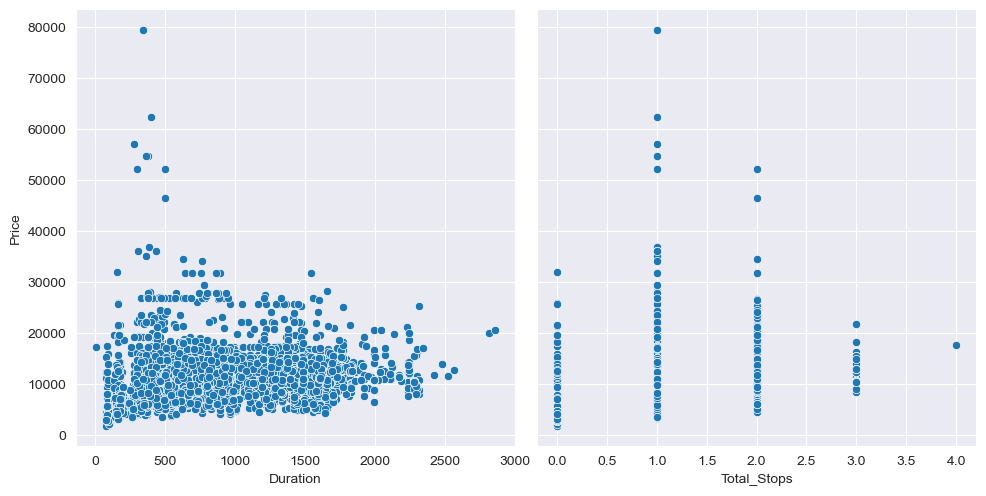

In [117]:
# Scatter plot
sns.pairplot(df, x_vars=['Duration', 'Total_Stops'], y_vars='Price', height=5, aspect=1)
plt.show()

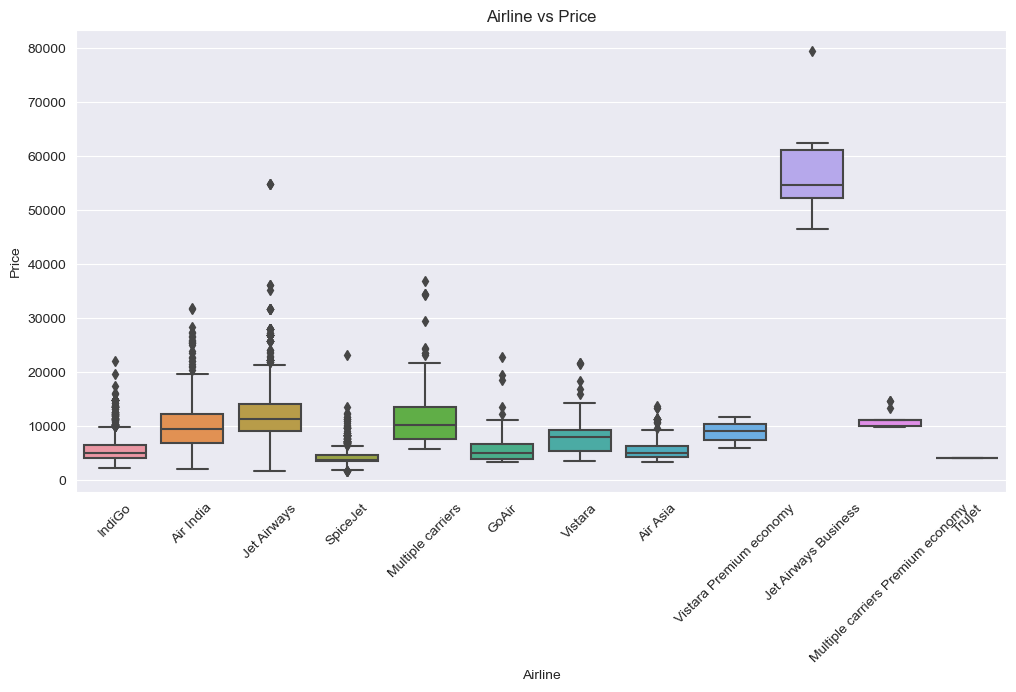

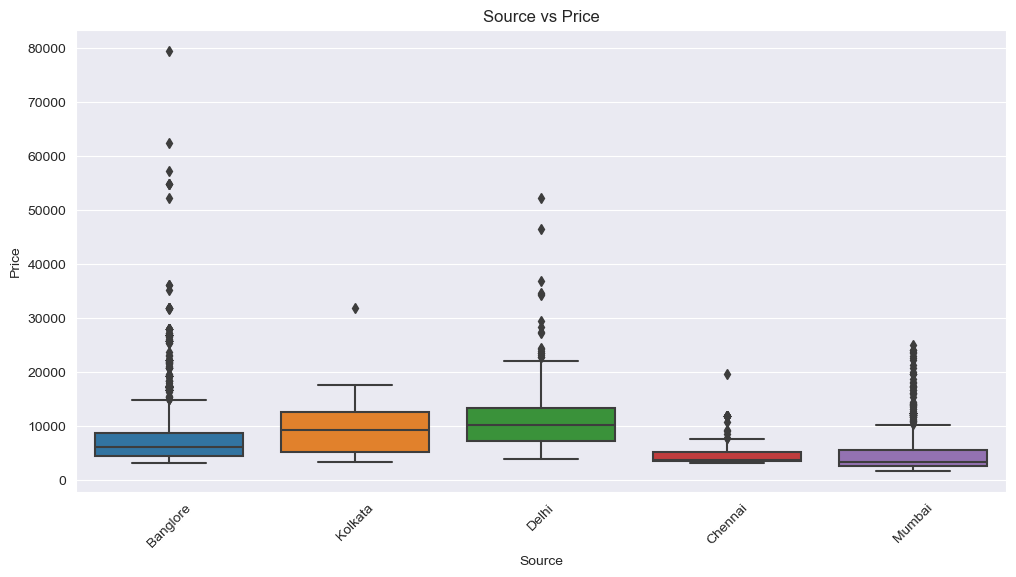

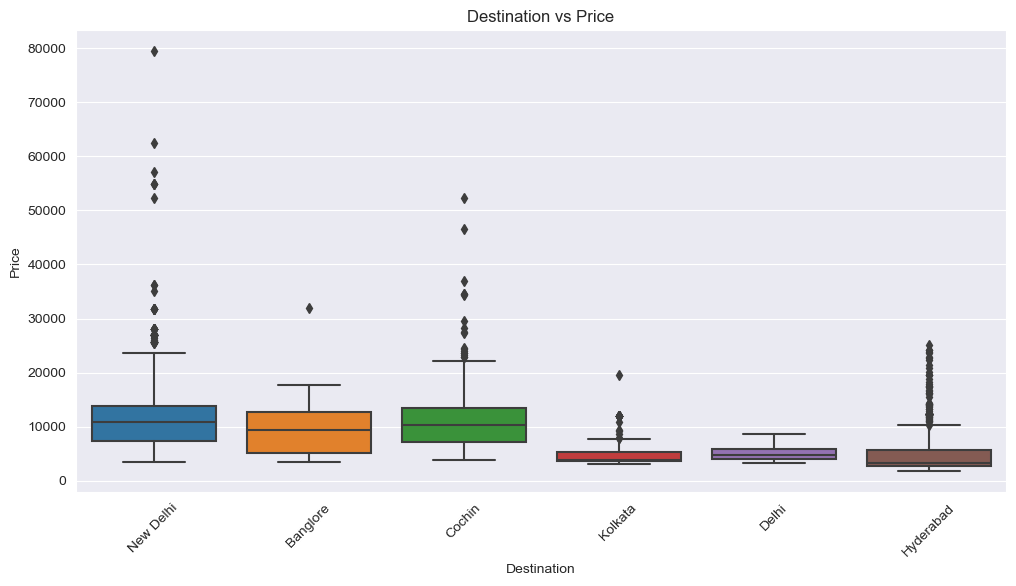

In [118]:
# Boxplots
for column in ['Airline', 'Source', 'Destination']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=column, y='Price')
    plt.title(f"{column} vs Price")
    plt.xticks(rotation=45)
    plt.show()

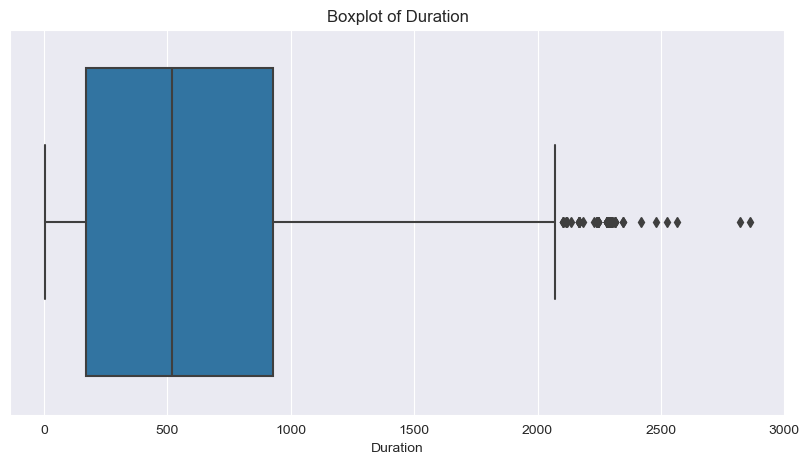

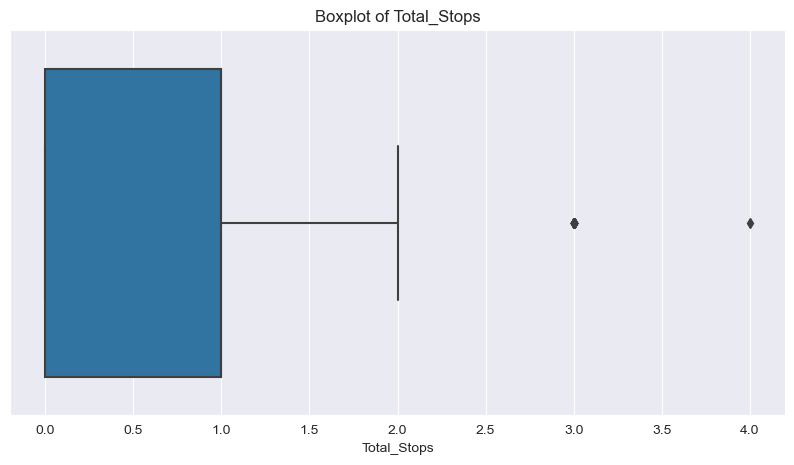

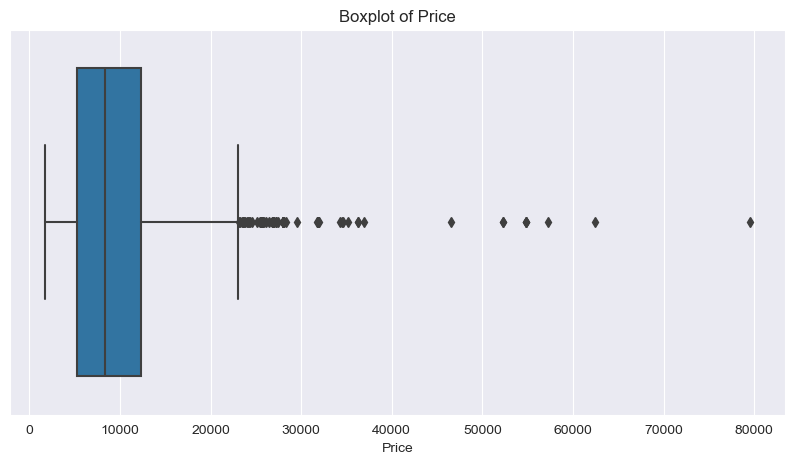

In [119]:
# Boxplot for numerical features
for column in ['Duration', 'Total_Stops', 'Price']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()